In [50]:
import requests
import pandas as pd
from pandas import DataFrame 
!pip install geopy
from geopy.extra.rate_limiter import RateLimiter

%matplotlib inline
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import io
import time
from pprint import pprint 
print("Import Successful")
#!wget https://www150.statcan.gc.ca/n1/tbl/csv/10100084-eng.zip
#!unzip 10100084-eng.zip

Import Successful


In [51]:
df = pd.read_csv("TorontoListings.csv")


In [52]:
df = df[['neighbourhood',  'room_type','price']]
cols = list(df.columns.values)
print(cols)

['neighbourhood', 'room_type', 'price']


In [53]:
print(df)

                           neighbourhood        room_type  price
0                        Little Portugal  Entire home/apt    469
1      Waterfront Communities-The Island     Private room     98
2                                  Annex     Private room     66
3                   Briar Hill-Belgravia     Private room     70
4      Waterfront Communities-The Island  Entire home/apt    125
...                                  ...              ...    ...
18741                     Yonge-Eglinton  Entire home/apt     65
18742                   Newtonbrook East  Entire home/apt    158
18743                    Bayview Village  Entire home/apt     70
18744             Corso Italia-Davenport     Private room     39
18745                            Niagara  Entire home/apt     52

[18746 rows x 3 columns]


In [54]:
def priceRanker(val):
    if  val< 100:
        return 1
    elif 200 < val:
         return 2
    else :
         return 3
        

df["categoryPrice"] = df["price"].apply(priceRanker)

In [55]:
print(df)

                           neighbourhood        room_type  price  \
0                        Little Portugal  Entire home/apt    469   
1      Waterfront Communities-The Island     Private room     98   
2                                  Annex     Private room     66   
3                   Briar Hill-Belgravia     Private room     70   
4      Waterfront Communities-The Island  Entire home/apt    125   
...                                  ...              ...    ...   
18741                     Yonge-Eglinton  Entire home/apt     65   
18742                   Newtonbrook East  Entire home/apt    158   
18743                    Bayview Village  Entire home/apt     70   
18744             Corso Italia-Davenport     Private room     39   
18745                            Niagara  Entire home/apt     52   

       categoryPrice  
0                  2  
1                  1  
2                  1  
3                  1  
4                  3  
...              ...  
18741              1  

Text(0.5, 1.0, 'Room Type vs Price')

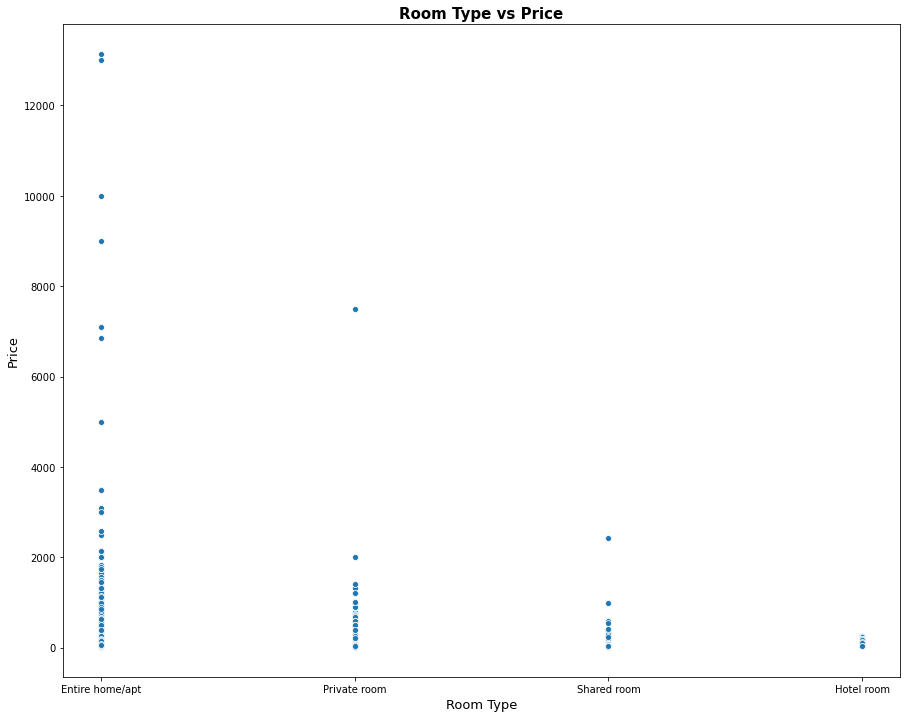

In [57]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Neighbourhood vs Price')

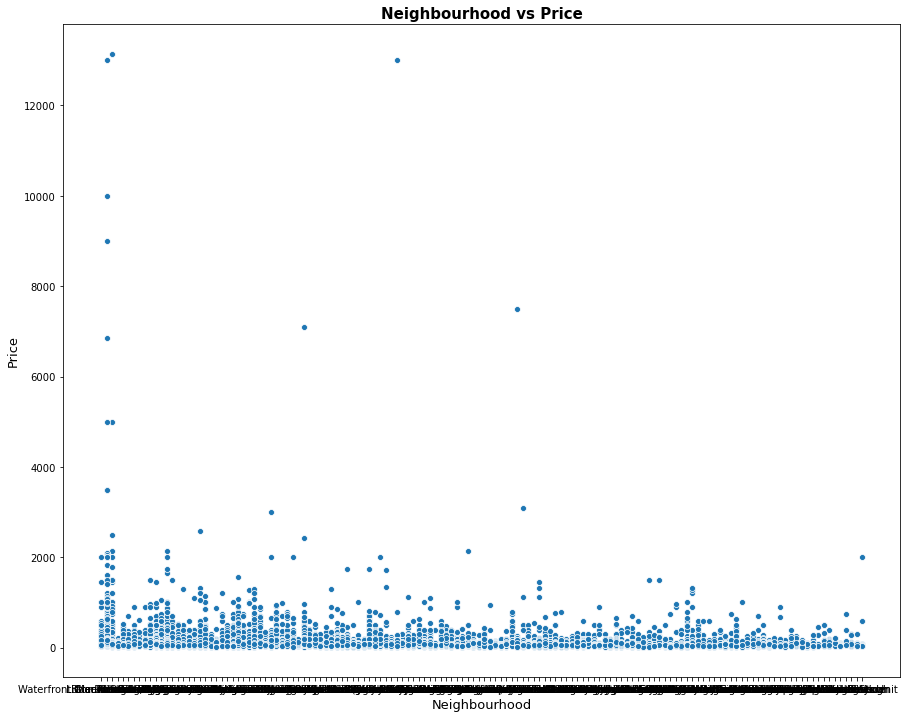

In [58]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='neighbourhood', y='price', data=df)

plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Price", size=13)
plt.title("Neighbourhood vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

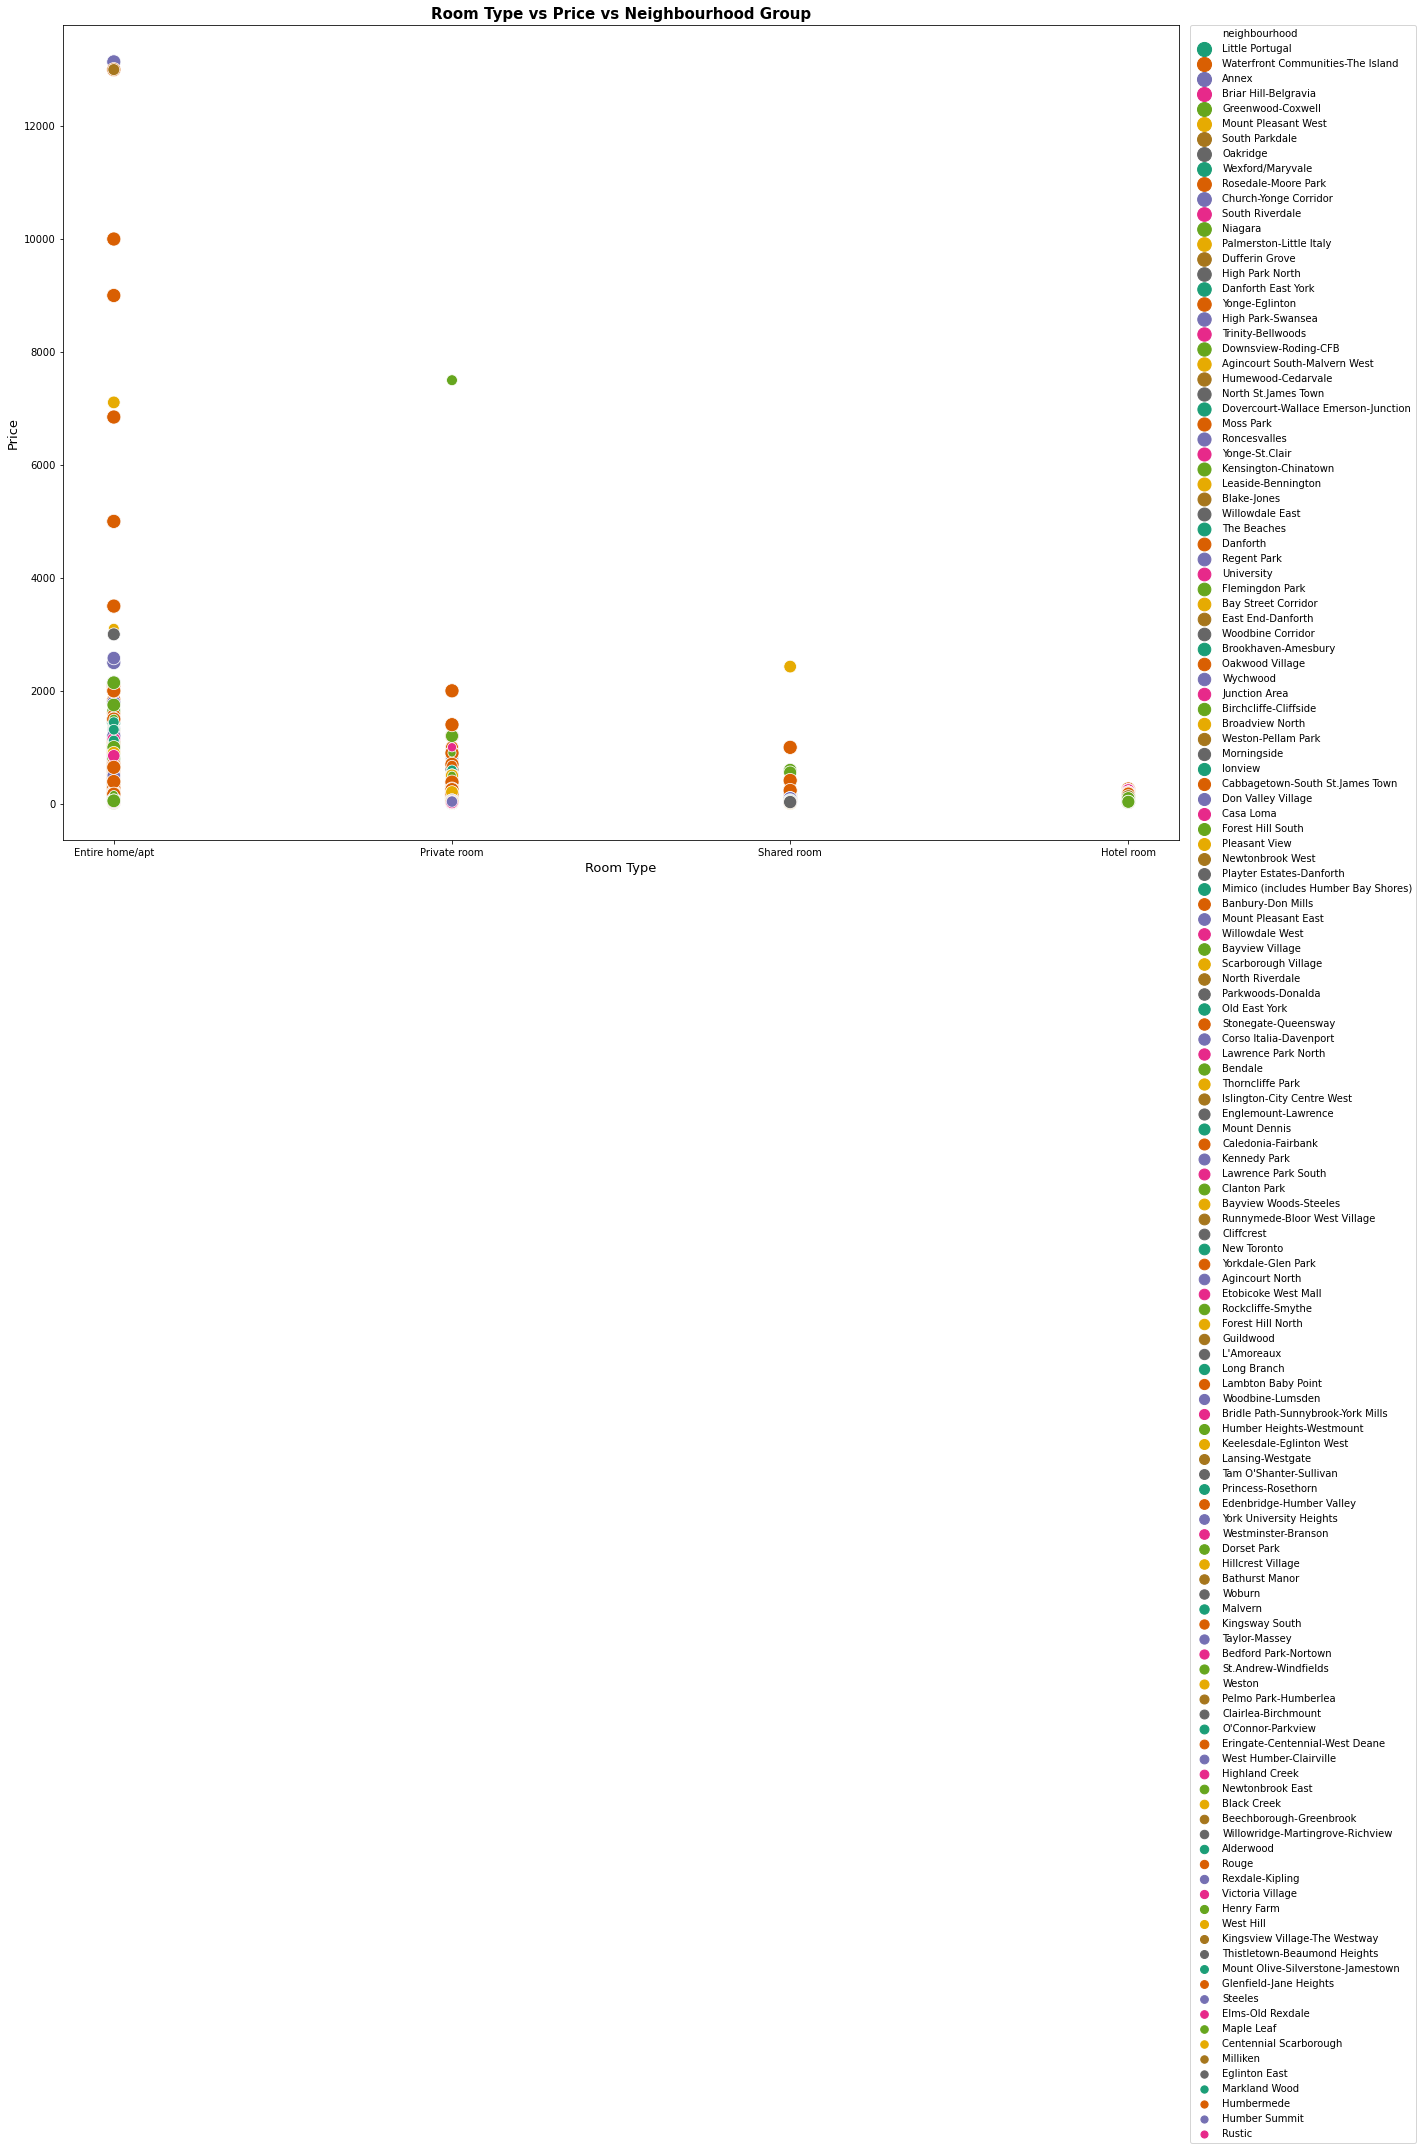

In [49]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood", size="neighbourhood",
            sizes=(50, 200), palette="Dark2", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')